In [5]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy 
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix, f1_score, roc_curve,auc
from sklearn.decomposition import PCA

In [6]:
df = pd.read_csv("../data/EmployeeAttrition.csv" )
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [7]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
df.shape

(1470, 35)

In [9]:
df.tail(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [10]:
df.dtypes.value_counts()

int64     26
object     9
Name: count, dtype: int64

<Axes: ylabel='count'>

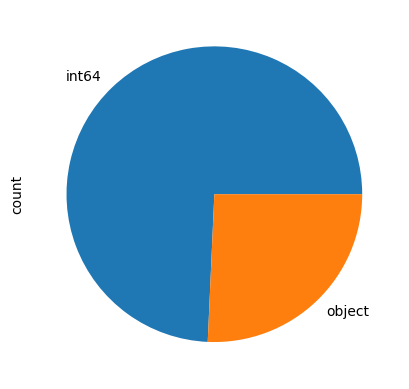

In [11]:
df.dtypes.value_counts().plot.pie()

In [12]:
df.isna()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<Axes: >

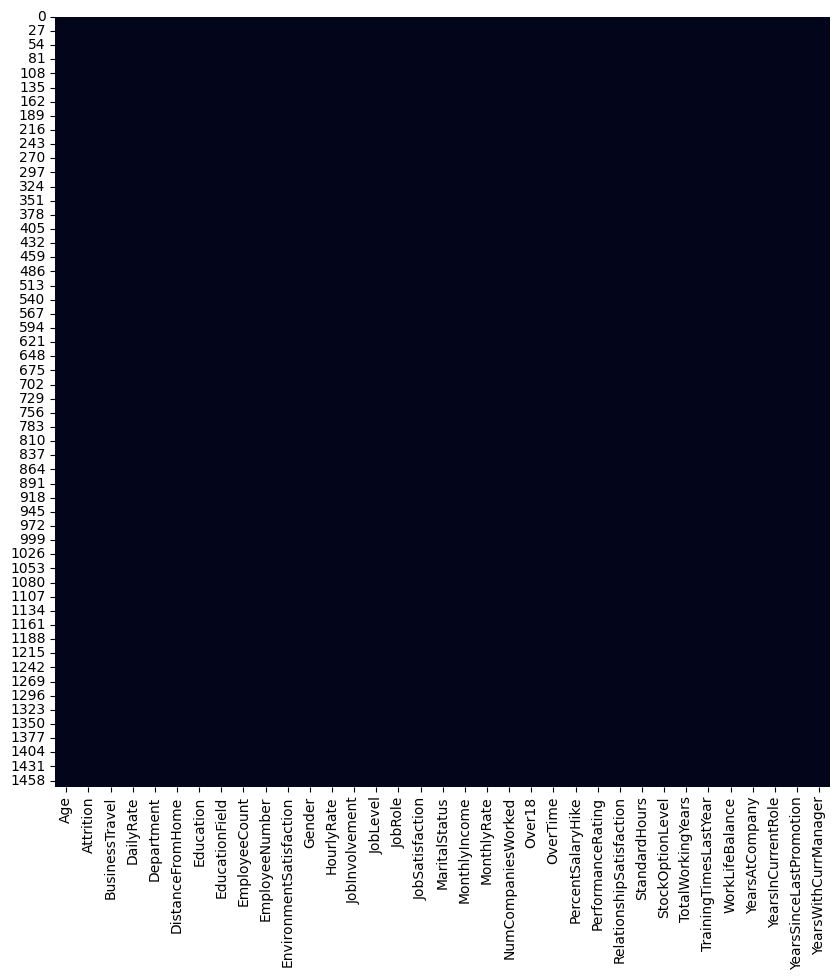

In [14]:
plt.figure(figsize=(10,10))
# sns.heatmap(df.select_dtypes(include=['number']).corr() , cbar=False) 
sns.heatmap(df.isna() , cbar=False) 

In [15]:
for i in df.columns :  
  print(df[i].value_counts())
  break

Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
38    58
33    58
40    57
37    50
28    48
27    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
48    19
51    19
53    19
54    18
52    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64


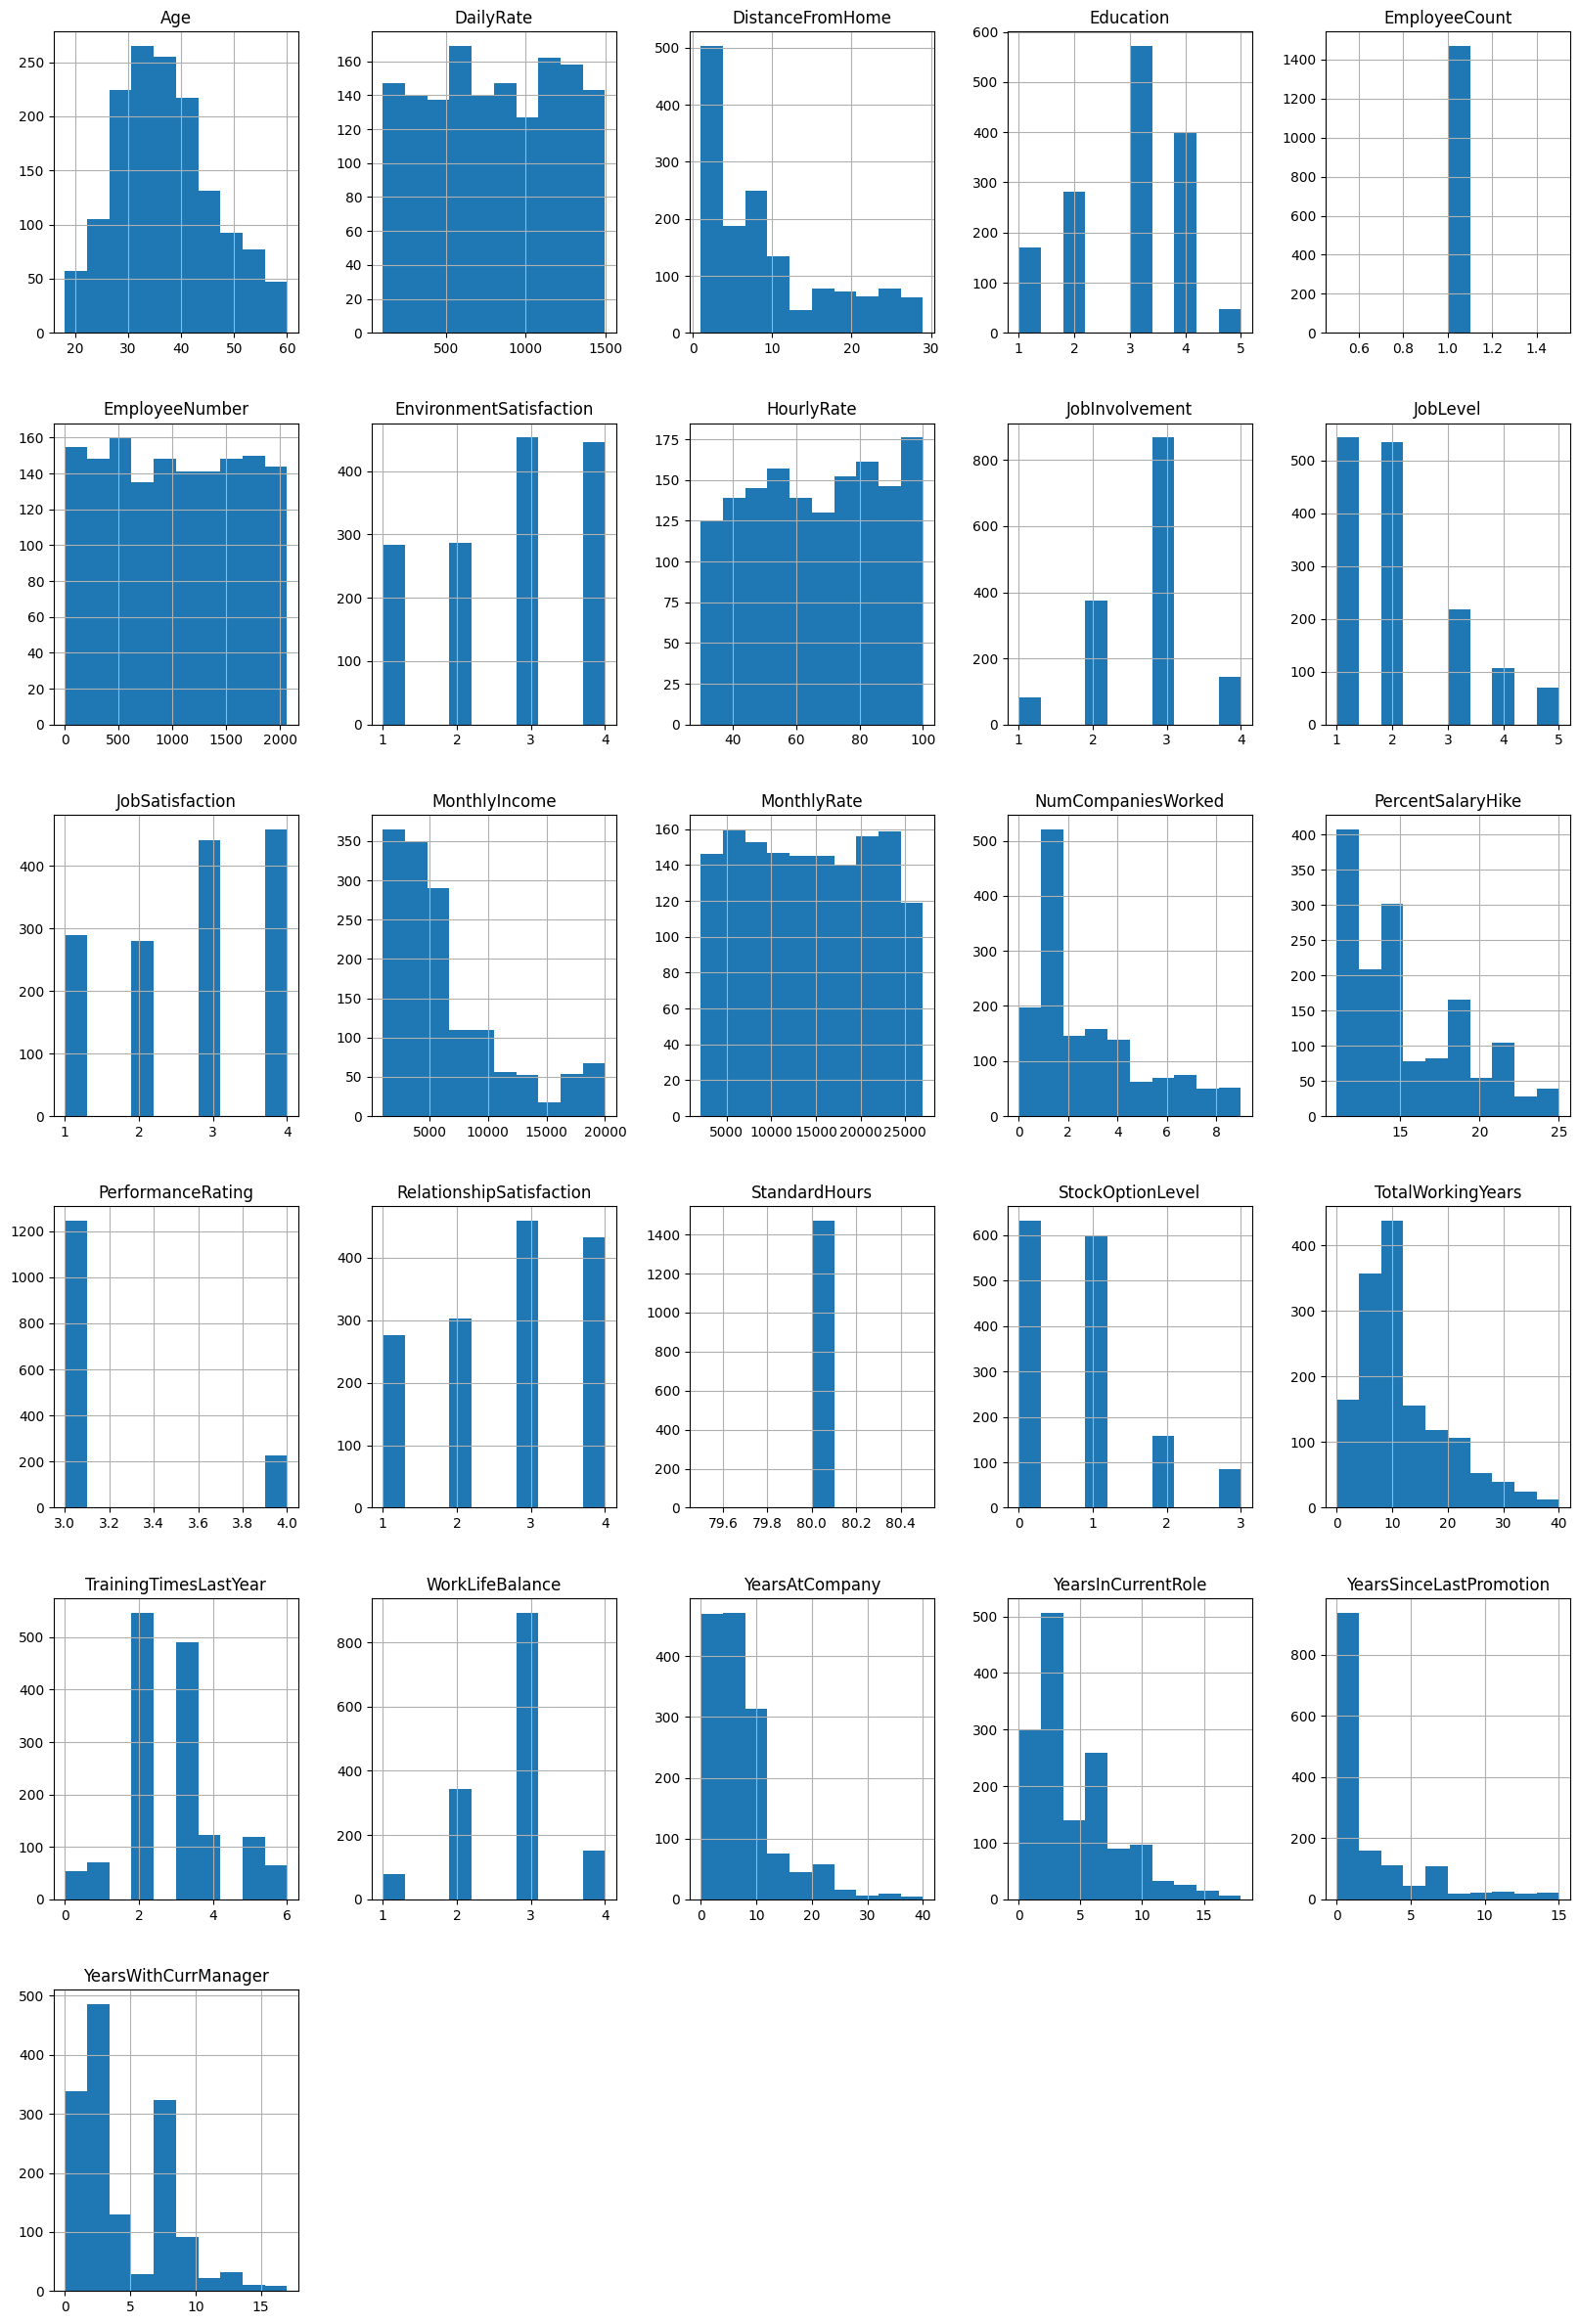

In [16]:
# Importing the necessary library for plotting
import matplotlib.pyplot as plt

# Display histograms for the entire dataset

df.hist(figsize=(20,30))
plt.show()





In [17]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


           frequency  frequency_percent
Attrition                              
No              1233              83.88
Yes              237              16.12


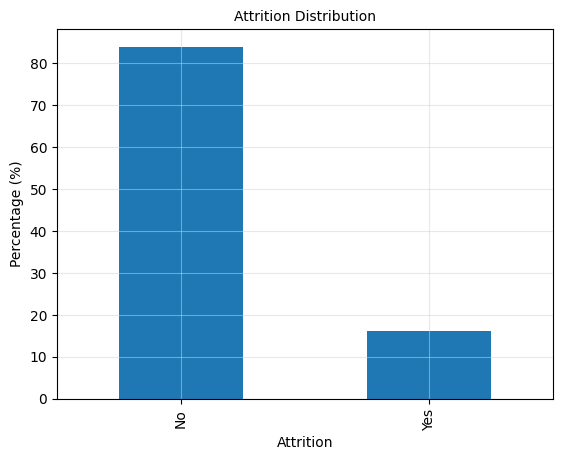

In [18]:
# Calculate the frequency and percentage distribution of the 'Attrition' column
attrition_freq = df['Attrition'].value_counts()  # Select the column and count values
attrition_freq = attrition_freq.to_frame(name='frequency')  # Convert to DataFrame for better handling
attrition_freq['frequency_percent'] = round((100 * attrition_freq['frequency'] / attrition_freq['frequency'].sum()), 2)  # Calculate percentages

# Print the frequency distribution
print(attrition_freq)

# Plot the 'Attrition' distribution as a bar plot
plot = attrition_freq['frequency_percent'].plot(kind="bar")  # Select the percentage column for plotting
plot.set_title("Attrition Distribution", fontsize=10)
plot.set_ylabel("Percentage (%)")
plot.set_xlabel("Attrition")
plot.grid(color='lightgray', alpha=0.5)

# Display the plot
plt.show()

In [19]:
# Select important numerical columns from the dataset
data1 = df.select_dtypes(include=['number'])  # Fill in the blanks with the column names

# Display the first few rows of the new DataFrame
data1.head()  # Fill in the blank to display the first rows of data1

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


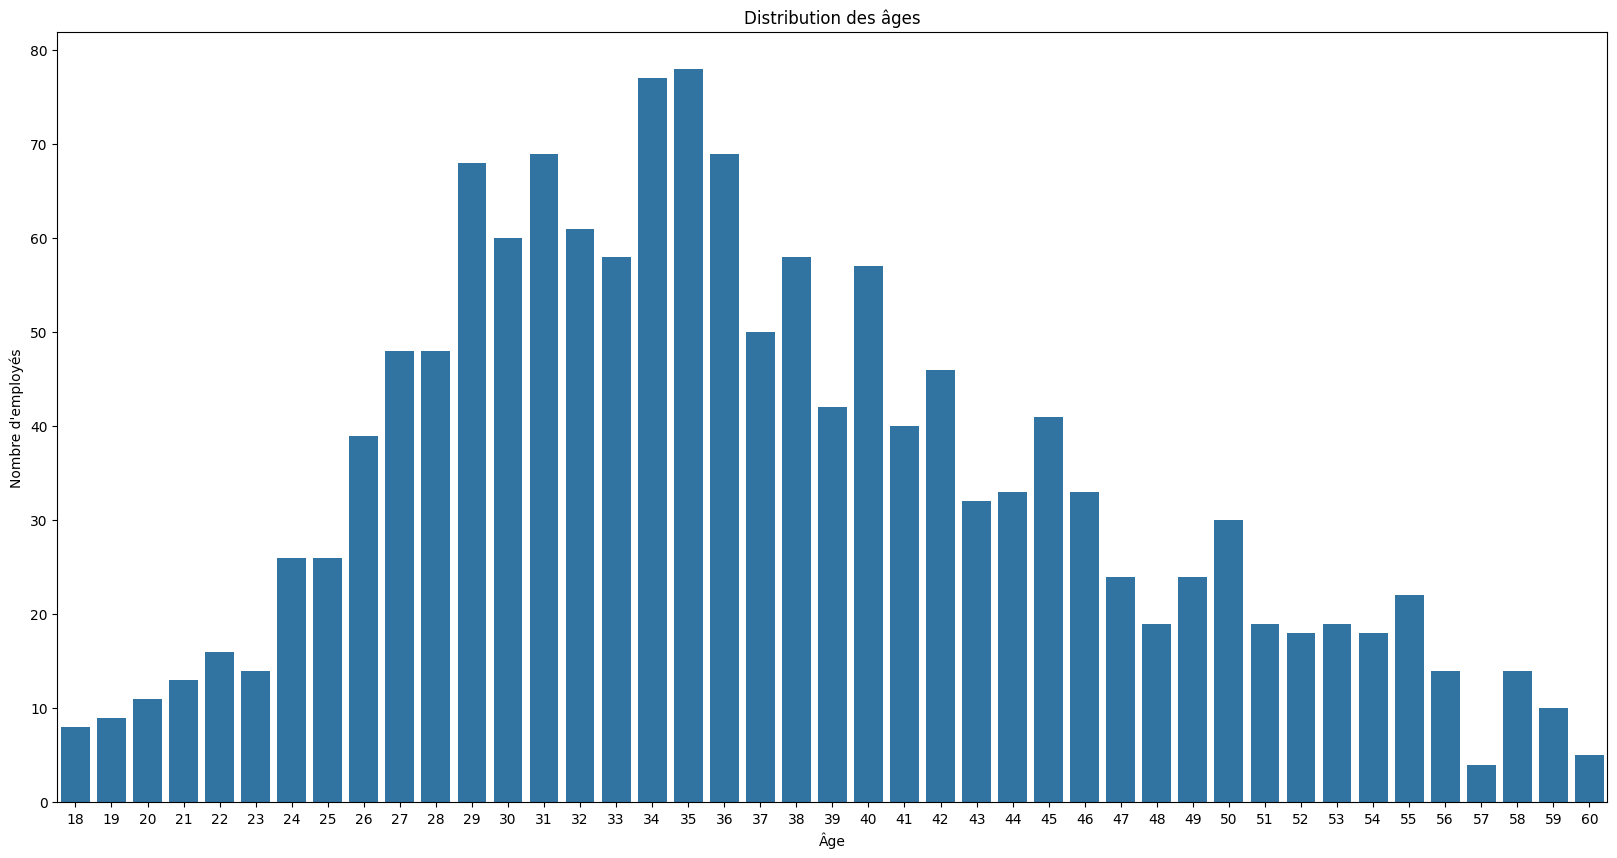

In [20]:
# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(20, 10))  # Fill in the blanks to set the figure size

# Create a countplot to visualize the distribution of 'Age'
sns.countplot(x='Age', data=df, ax=ax)  # Fill in the blank to create the countplot for the 'Age' column

# Set the title and labels for the axes
ax.set_title('Distribution des âges')
ax.set_xlabel('Âge')
ax.set_ylabel('Nombre d\'employés')

# Display the plot
plt.show()

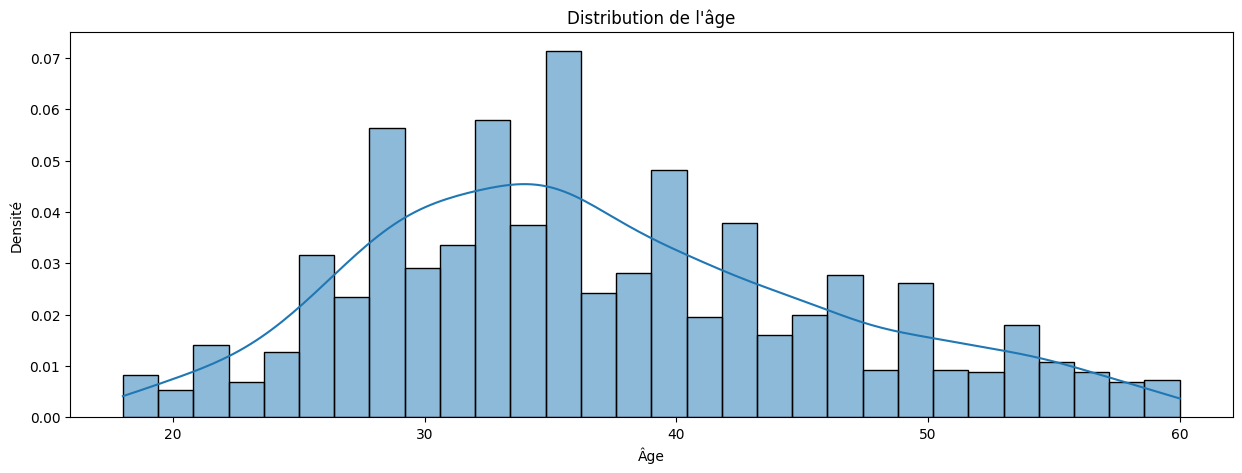

In [21]:
# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(15, 5))  

# Create a distribution plot for 'Age'  
sns.histplot(df['Age'], ax=ax, stat='density', bins=30, kde=True)  # Create a histogram with KDE  

# Set the title and labels for the axes  
ax.set_title('Distribution de l\'âge')  
ax.set_xlabel('Âge')  
ax.set_ylabel('Densité')  

# Display the plot  
plt.show()  

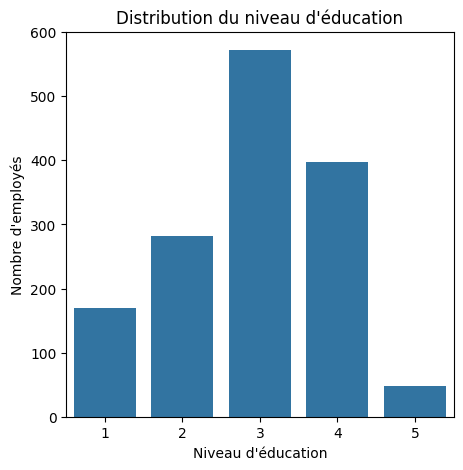

In [22]:
fig, ax = plt.subplots(figsize=(5, 5))

# Create a countplot to visualize the distribution of 'Education'
sns.countplot(data=df , x='Education') # Fill in the blank to create the countplot for the 'Education' column

ax.set_title('Distribution du niveau d\'éducation')
ax.set_xlabel('Niveau d\'éducation')
ax.set_ylabel('Nombre d\'employés')
plt.show()

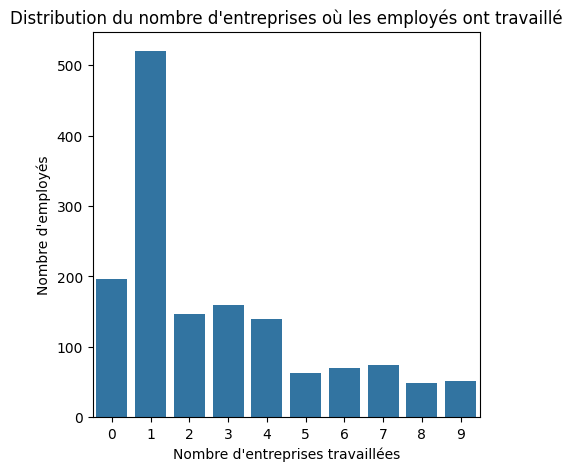

In [23]:
fig, ax = plt.subplots(figsize=(5, 5))

# Create a countplot to visualize the distribution of 'NumCompaniesWorked'
sns.countplot(data=df , x='NumCompaniesWorked')

ax.set_title('Distribution du nombre d\'entreprises où les employés ont travaillé')
ax.set_xlabel('Nombre d\'entreprises travaillées')
ax.set_ylabel('Nombre d\'employés')
plt.show()


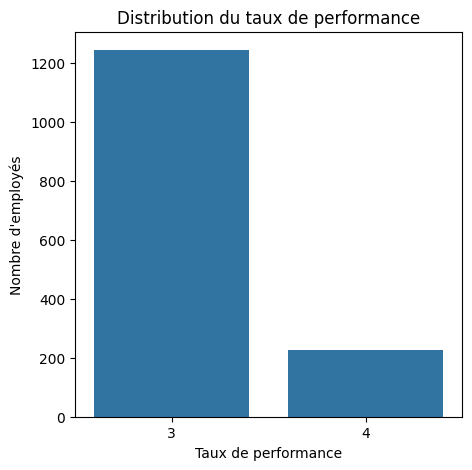

In [24]:
plt.subplots(figsize=(5, 5))

# Create a countplot to visualize the distribution of 'PerformanceRating'
sns.countplot(data=df , x='PerformanceRating')

plt.title('Distribution du taux de performance')
plt.xlabel('Taux de performance')
plt.ylabel('Nombre d\'employés')
plt.show()

<Axes: >

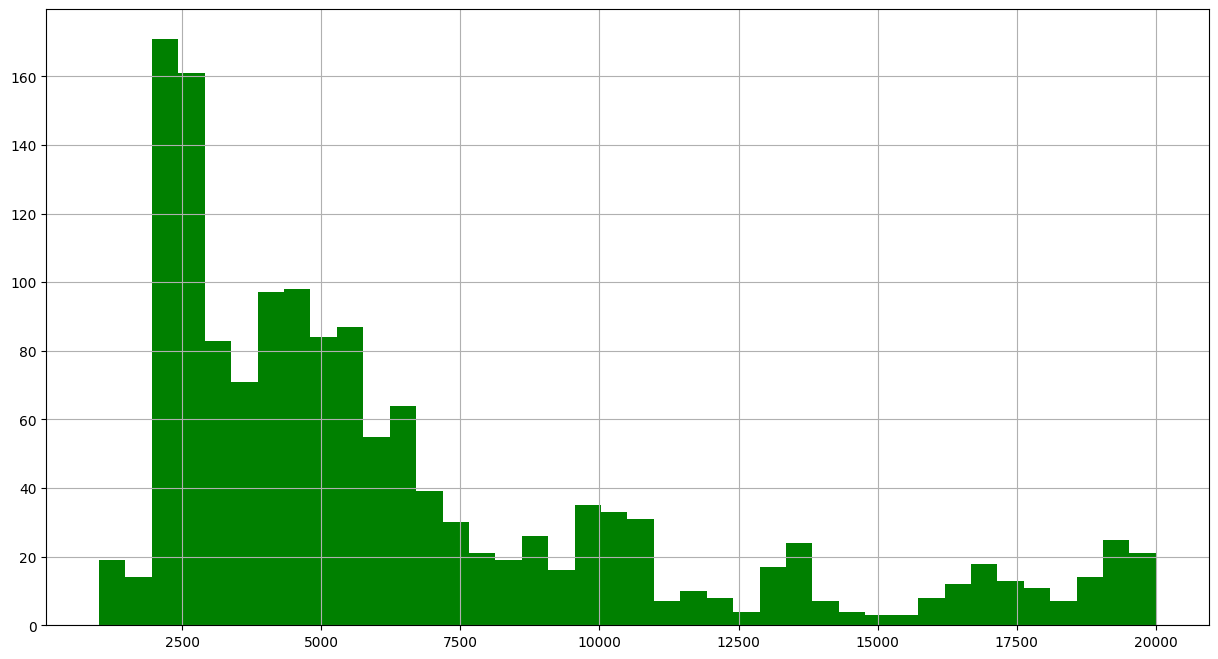

In [25]:
# Create a histogram to visualize the distribution of 'MonthlyIncome'
df['MonthlyIncome'].hist(color='green',bins=40,figsize=(15,8))

<Axes: >

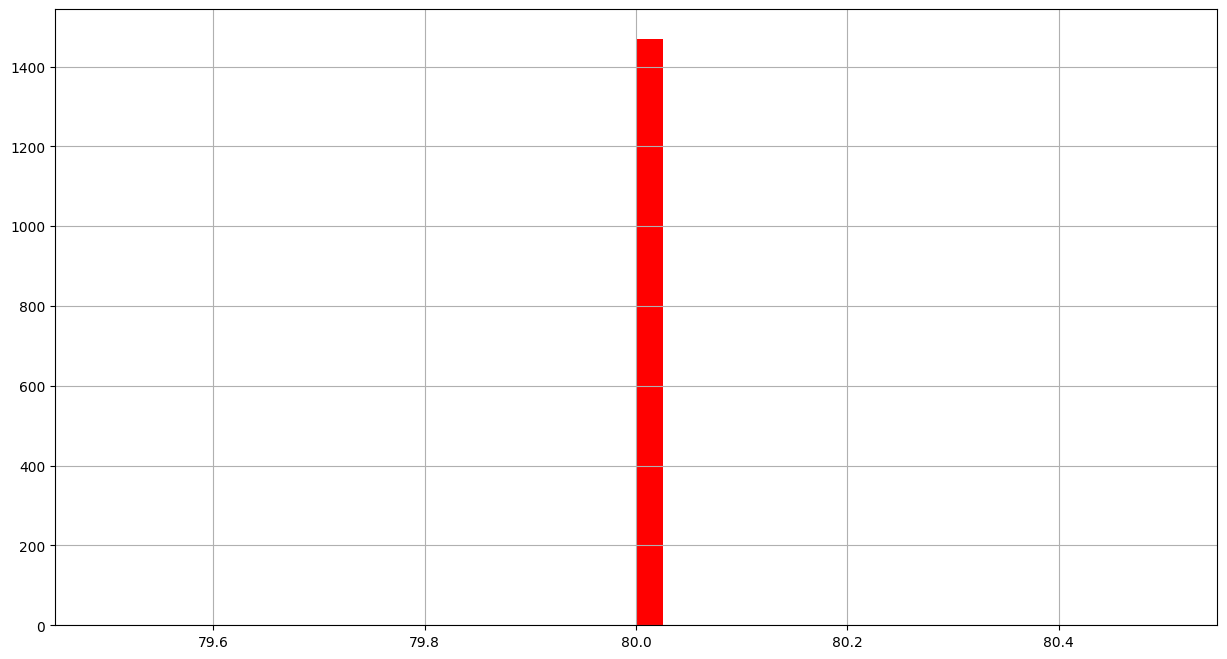

In [26]:
# Create a histogram to visualize the distribution of 'StandardHours'
df['StandardHours'].hist(color='red',bins=40 , figsize=(15,8))


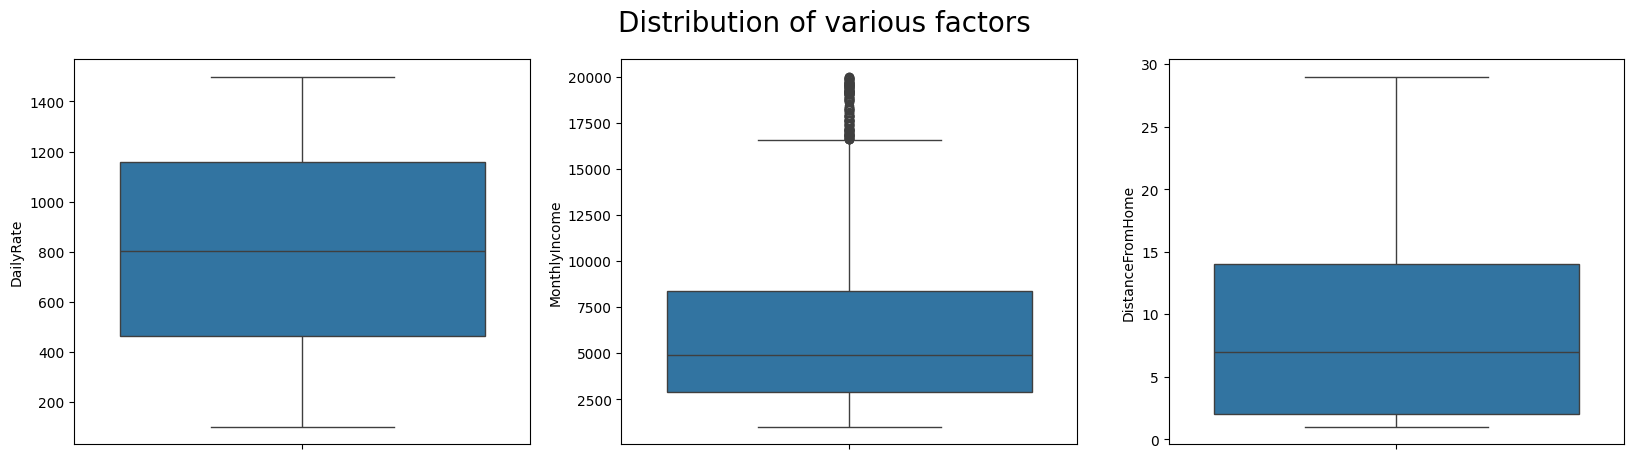

In [27]:
# Plotting a boxplot to study the distribution of features
fig,ax = plt.subplots(1,3, figsize=(20,5))               
plt.suptitle("Distribution of various factors", fontsize=20)
# Create boxplots for 'DailyRate', 'MonthlyIncome', and 'DistanceFromHome'
sns.boxplot(df['DailyRate'], ax = ax[0]) 
sns.boxplot(df['MonthlyIncome'], ax = ax[1]) 
sns.boxplot(df['DistanceFromHome'], ax = ax[2])  
plt.show()


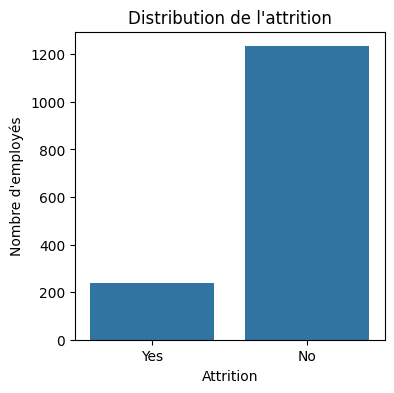

In [28]:
plt.subplots(figsize=(4,4))
sns.countplot(x='Attrition', data=df)
plt.title('Distribution de l\'attrition')
plt.xlabel('Attrition')
plt.ylabel('Nombre d\'employés')
plt.show()

<Axes: xlabel='Attrition', ylabel='count'>

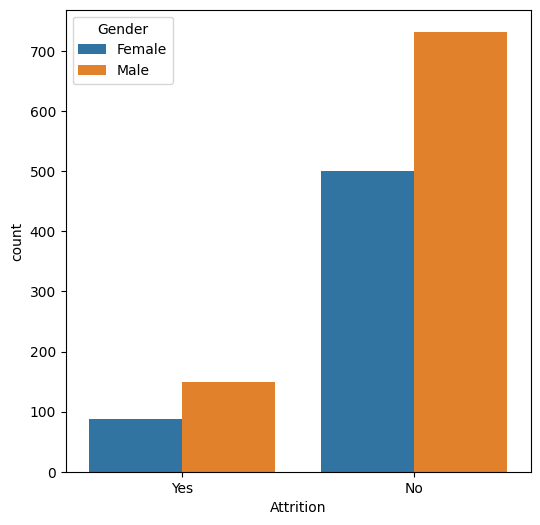

In [29]:
plt.subplots(figsize=(6,6))
sns.countplot(x='Attrition', hue='Gender', data = df)

<Axes: xlabel='BusinessTravel', ylabel='count'>

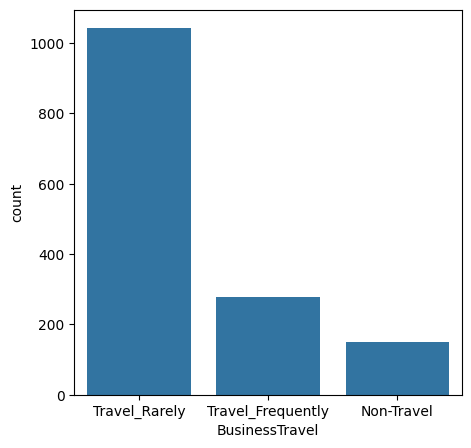

In [30]:
plt.subplots(figsize=(5,5))
sns.countplot(x='BusinessTravel', data=df)

<Axes: xlabel='BusinessTravel', ylabel='count'>

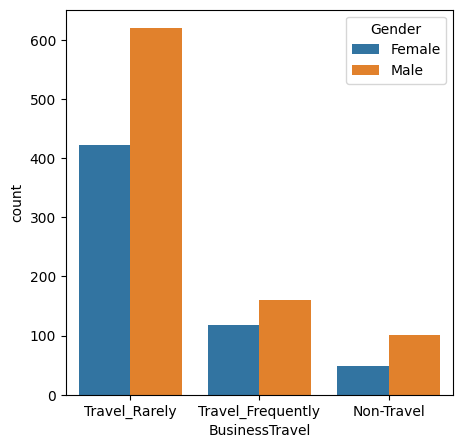

In [31]:
plt.subplots(figsize=(5,5))
sns.countplot(x='BusinessTravel',hue='Gender', data=df)

<Axes: xlabel='BusinessTravel', ylabel='count'>

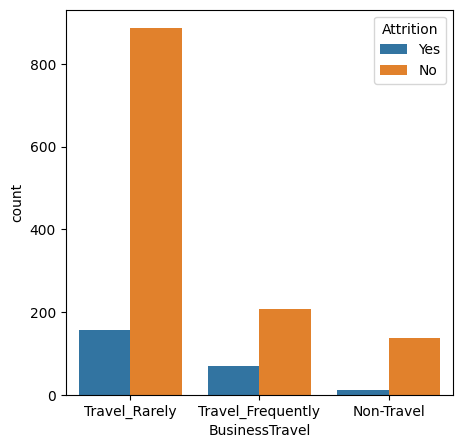

In [32]:
plt.subplots(figsize=(5,5))
sns.countplot(x='BusinessTravel', hue='Attrition',data=df)

<Axes: xlabel='MaritalStatus', ylabel='count'>

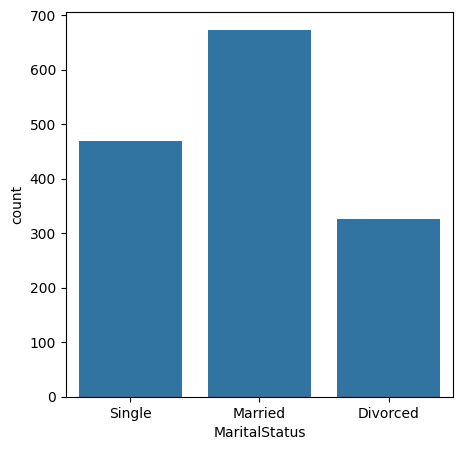

In [33]:
plt.subplots(figsize=(5,5))
sns.countplot(x='MaritalStatus', data=df)

Text(0.5, 1.0, 'Marital Status')

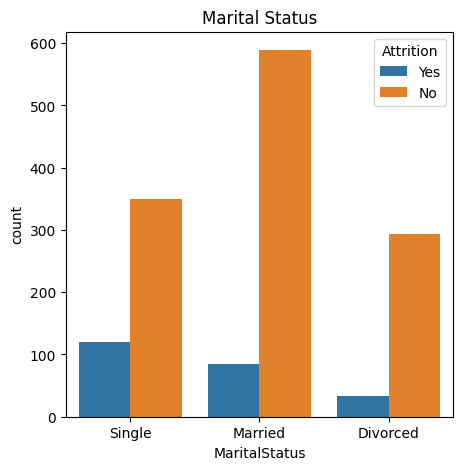

In [34]:
plt.subplots(figsize=(5,5))
sns.countplot(x='MaritalStatus', hue='Attrition', data=df)
plt.title('Marital Status')

<Axes: xlabel='JobRole', ylabel='count'>

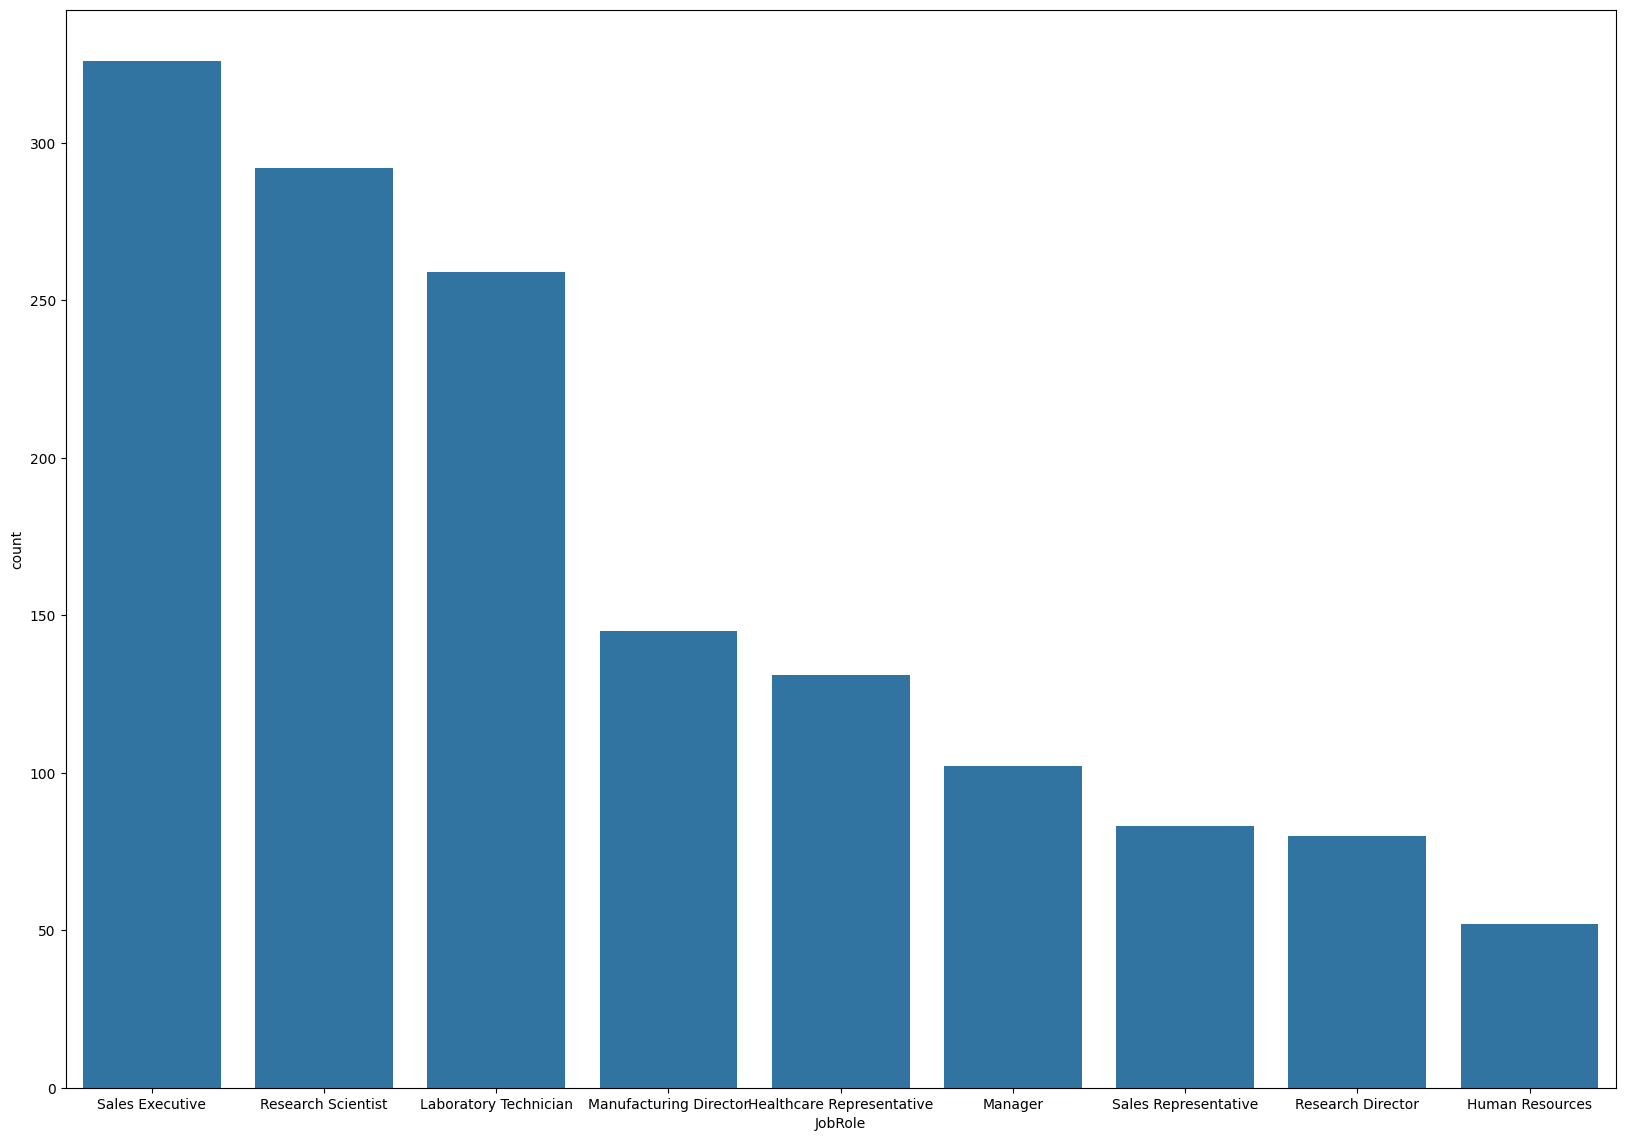

In [35]:
fig = plt.gcf() # Get the current figure
fig.set_size_inches(20,14)
sns.countplot(x='JobRole', data=df)

Text(0.5, 1.0, 'Job Role Between Male and Female')

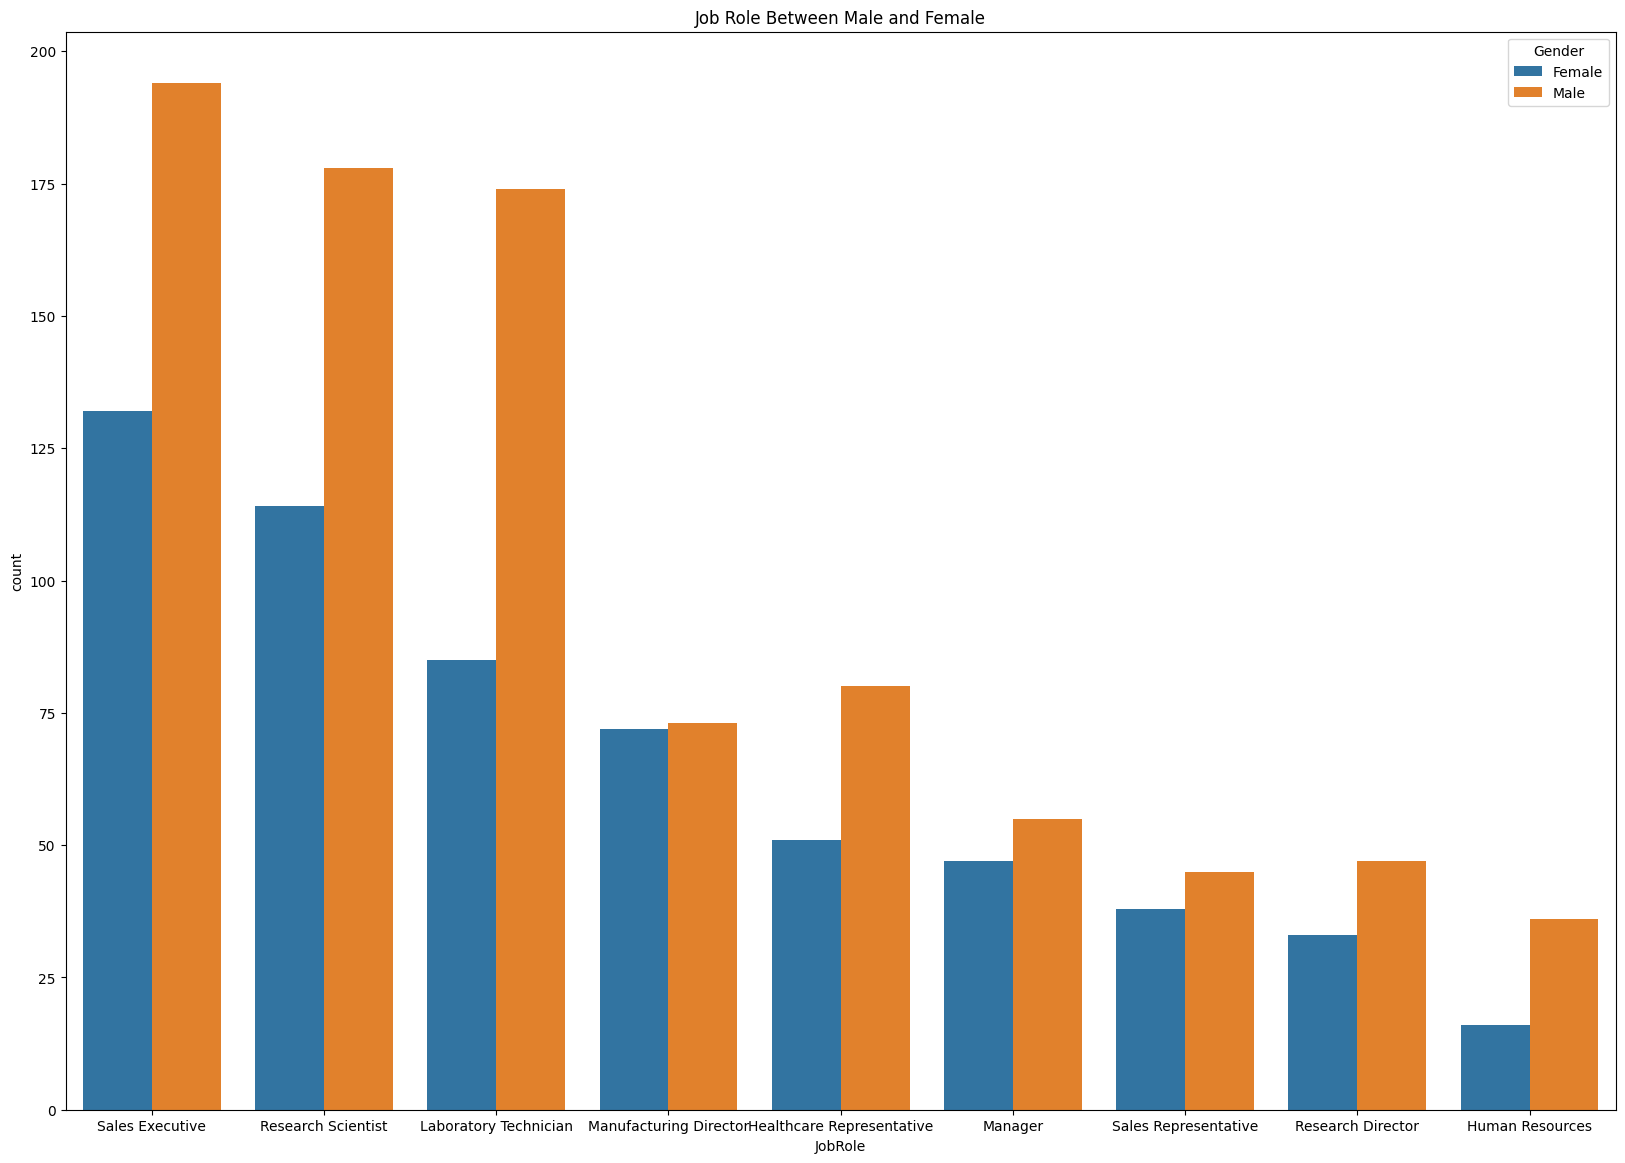

In [36]:
fig = plt.gcf() # Get the current figure
fig.set_size_inches(20,14)
sns.countplot(x='JobRole', hue='Gender',data=df)
plt.title('Job Role Between Male and Female')

<Axes: xlabel='Gender', ylabel='count'>

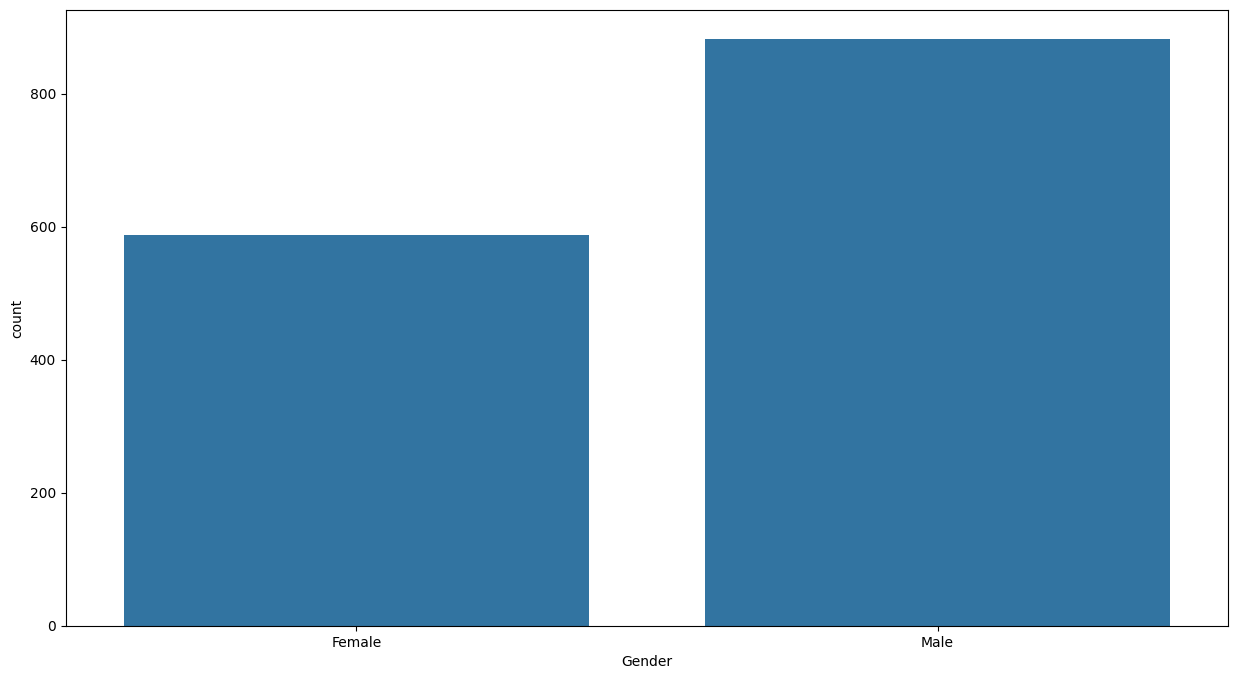

In [37]:
plt.subplots(figsize=(15,8))
sns.countplot(x='Gender',data=df)

<Axes: xlabel='EducationField', ylabel='count'>

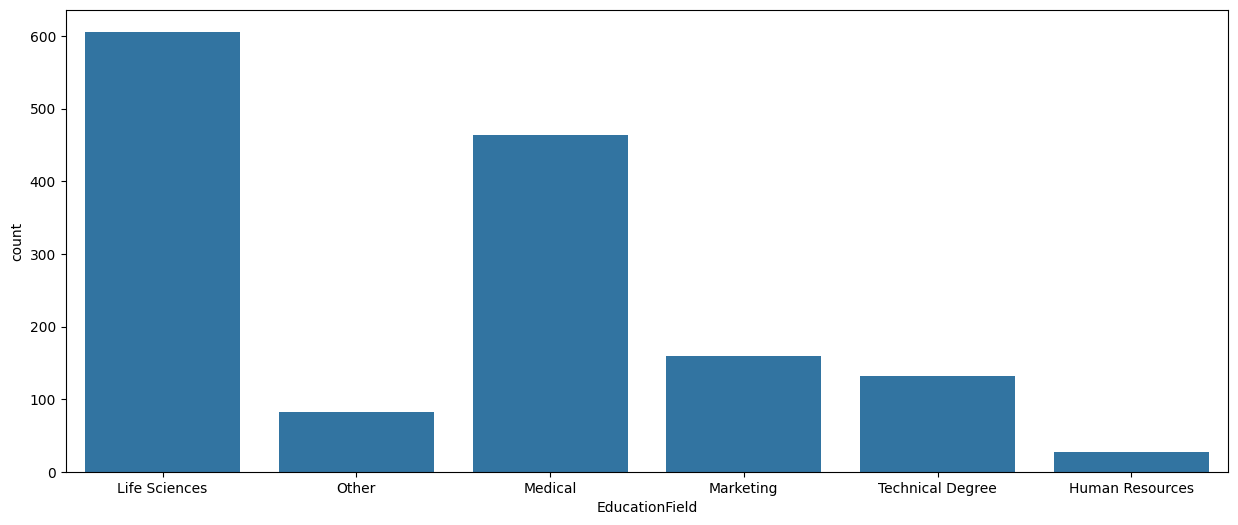

In [38]:
plt.subplots(figsize=(15,6))
sns.countplot(x='EducationField', data=df)

<Axes: xlabel='EducationField', ylabel='count'>

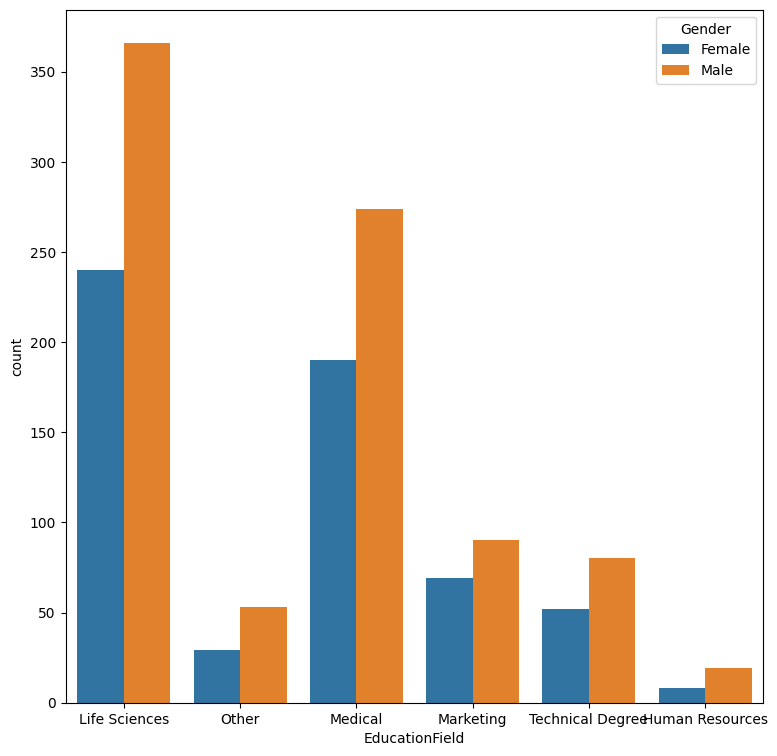

In [39]:
plt.subplots(figsize=(9,9))
sns.countplot(x='EducationField', hue='Gender',data=df)

<Axes: xlabel='Department', ylabel='count'>

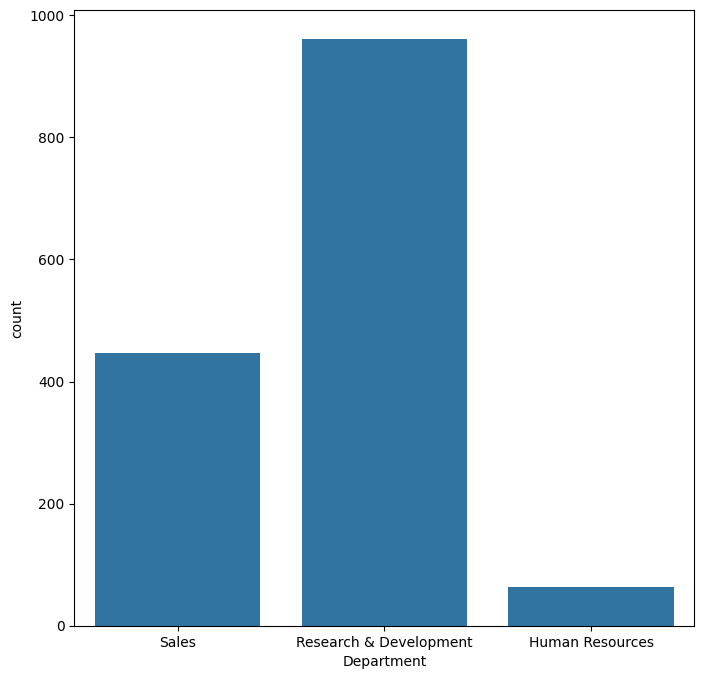

In [40]:
plt.subplots(figsize=(8,8))
sns.countplot(x='Department', data=df)

<Axes: xlabel='Department', ylabel='count'>

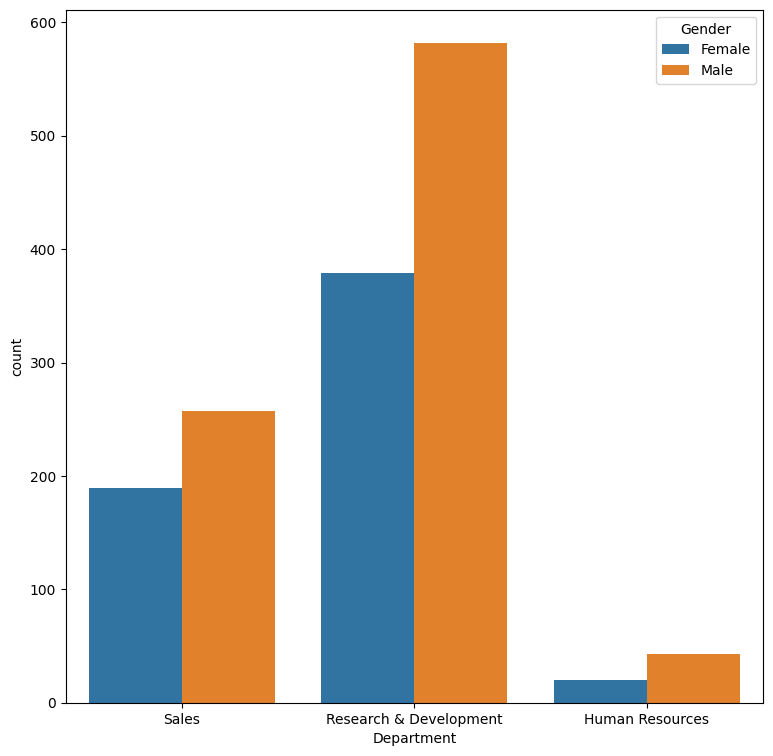

In [41]:
plt.subplots(figsize=(9,9))
sns.countplot(x='Department', hue='Gender',data=df)

<Axes: xlabel='Department', ylabel='count'>

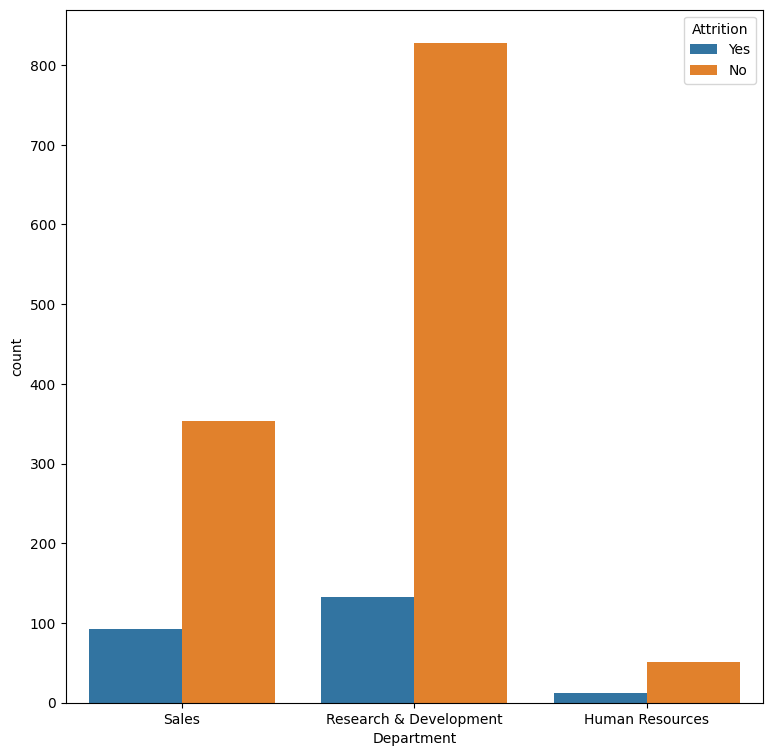

In [42]:
plt.subplots(figsize=(9,9))
sns.countplot(x='Department', hue='Attrition',data=df)

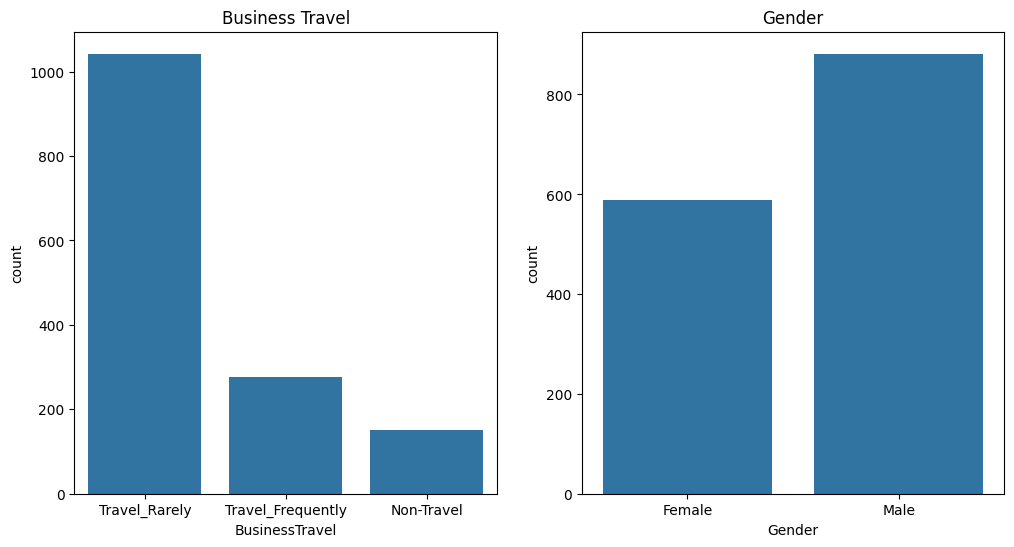

In [43]:
# Création de graphiques avec Seaborn
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='BusinessTravel', data=df)
plt.title('Business Travel')

plt.subplot(1, 2, 2)
sns.countplot(x='Gender', data=df)
plt.title('Gender')

plt.show()

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 37.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


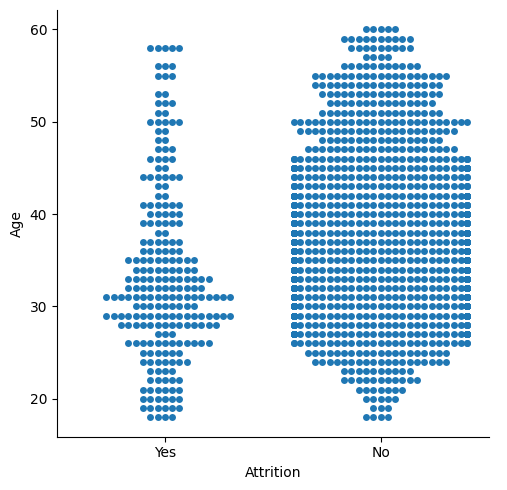

In [44]:
sns.catplot(x="Attrition", y="Age", kind="swarm", data=df)

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 31.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


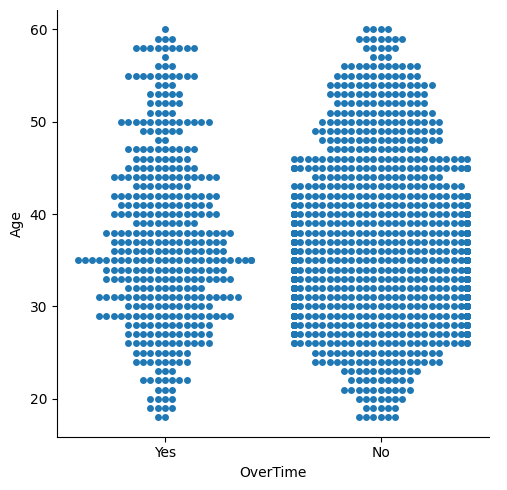

In [45]:
sns.catplot(x="OverTime", y="Age", kind="swarm", data=df)

<Axes: xlabel='Education', ylabel='Age'>

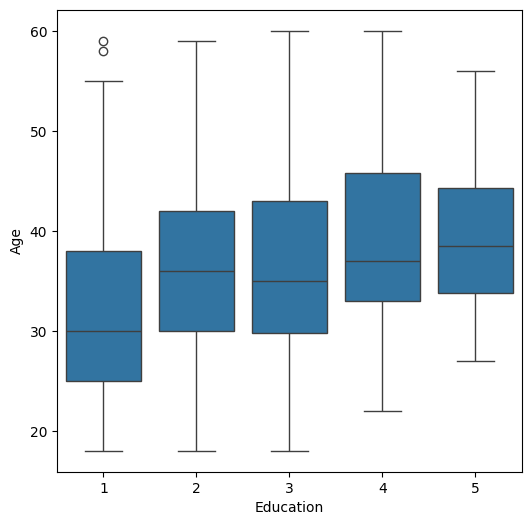

In [46]:
plt.figure(figsize=(6,6))
sns.boxplot(x='Education',y='Age',data=df)

<Axes: xlabel='PercentSalaryHike', ylabel='Age'>

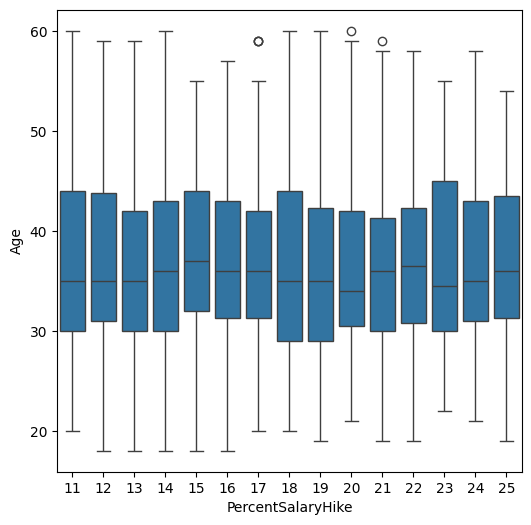

In [47]:
plt.figure(figsize=(6,6))
sns.boxplot(x='PercentSalaryHike',y='Age',data=df)

In [48]:
# Combine levels in a categorical variable by seeing their distribution
# Create a cross-tabulation to see the distribution of 'JobRole' by 'Attrition'
JobRoleCrossTab = pd.crosstab(df['JobRole'], df['Attrition'], margins=True)
JobRoleCrossTab

Attrition,No,Yes,All
JobRole,,,
Healthcare Representative,122,9,131
Human Resources,40,12,52
Laboratory Technician,197,62,259
Manager,97,5,102
Manufacturing Director,135,10,145
Research Director,78,2,80
Research Scientist,245,47,292
Sales Executive,269,57,326
Sales Representative,50,33,83


In [49]:
# Normalize the cross-tabulation by dividing each value by the total ('All') in each row
JobRoleCrossTabNormalized = JobRoleCrossTab.div(JobRoleCrossTab["All"], axis=0)
JobRoleCrossTabNormalized


Attrition,No,Yes,All
JobRole,,,
Healthcare Representative,0.931298,0.068702,1.0
Human Resources,0.769231,0.230769,1.0
Laboratory Technician,0.760618,0.239382,1.0
Manager,0.950980,0.049020,1.0
Manufacturing Director,0.931034,0.068966,1.0
Research Director,0.975000,0.025000,1.0
Research Scientist,0.839041,0.160959,1.0
Sales Executive,0.825153,0.174847,1.0
Sales Representative,0.602410,0.397590,1.0


In [50]:
import pandas as pd
import hvplot.pandas
df.hvplot.hist(y='DistanceFromHome', by='Attrition', subplots=False, width=600, height=300, bins=30)

:NdOverlay   [Attrition]
   :Histogram   [DistanceFromHome]   (Count)

In [51]:
df.hvplot.hist(y='Education', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [Education]   (Count)

In [52]:
df.hvplot.hist(y='RelationshipSatisfaction', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [RelationshipSatisfaction]   (Count)

In [53]:
df.hvplot.hist(y='EnvironmentSatisfaction', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [EnvironmentSatisfaction]   (Count)

In [54]:
df.hvplot.hist(y='JobInvolvement', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [JobInvolvement]   (Count)

In [55]:
df.hvplot.hist(y='JobLevel', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [JobLevel]   (Count)

In [56]:
df.hvplot.hist(y='JobSatisfaction', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [JobSatisfaction]   (Count)

1.  Environment Satisfaction:  While there are more total employees in the higher satisfaction levels, they show a lower percentage of attrition

2. job involvment  : This suggests that employees who are more involved in their jobs are less likely to leave

3. Job level: This indicates that junior employees are more likely to leave than senior employees

4. Job Satisfaction  : There's slightly higher attrition in lower satisfaction levels

In [57]:
df.hvplot.hist(y='NumCompaniesWorked', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [NumCompaniesWorked]   (Count)

In [58]:
df.hvplot.hist(y='PercentSalaryHike', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [PercentSalaryHike]   (Count)

In [59]:
df.hvplot.hist(y='StockOptionLevel', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [StockOptionLevel]   (Count)

In [60]:
df.hvplot.hist(y='TrainingTimesLastYear', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [TrainingTimesLastYear]   (Count)


- There appears to be a general trend where people with fewer previous companies (0-2) have higher attrition rates compared to those who have worked at more companies
- Employees with higher salary hikes (16% and above) show fewer cases of attrition (leaving the company).
- Offering stock options seems to have a positive impact on reducing attrition, as higher levels of stock options are associated with better retention.
- Employees with minimal training sessions (0 or 1) are more likely to leave, indicating the importance of professional development opportunities for reducing attrition.

In [61]:
df.hvplot.hist(y='Age', by='Attrition', subplots=False, width=600, height=300, bins=35)

:NdOverlay   [Attrition]
   :Histogram   [Age]   (Count)

Give me 3 observations resulting in the cell above :

- Young employees (ages 25-35) show the highest attrition rates
- The workforce is predominantly concentrated in the 30-45 age range
- Employees over 45 show significantly lower attrition rates

In [62]:
df.hvplot.hist(y='MonthlyIncome', by='Attrition', subplots=False, width=600, height=300, bins=50)

:NdOverlay   [Attrition]
   :Histogram   [MonthlyIncome]   (Count)

In [63]:
df.hvplot.hist(y='YearsAtCompany', by='Attrition', subplots=False, width=600, height=300, bins=35)

:NdOverlay   [Attrition]
   :Histogram   [YearsAtCompany]   (Count)

In [64]:
df.hvplot.hist(y='TotalWorkingYears', by='Attrition', subplots=False, width=600, height=300, bins=35)


:NdOverlay   [Attrition]
   :Histogram   [TotalWorkingYears]   (Count)

# Apres la visualisation de nos variables on remarque que :


- Les jeunes sont plus susceptibles de quitter l'entreprise, particulièrement dans la tranche d'âge 25-35 ans

- Le service commercial montre un taux d'attrition plus élevé que la moyenne

- Le poste avec le moins d'attrition semble être les postes de niveau supérieur (senior)

- Les employés masculins ont un taux d'attrition plus élevé que les femmes

- Les employés célibataires sont plus susceptibles de quitter l'entreprise

- Les personnes qui effectuent des heures supplémentaires ont un taux d'attrition plus élevé

- Les employés ayant moins de satisfaction holistique sont plus susceptibles de quitter l'entreprise

- Les employés ayant un faible niveau d'emploi, un revenu mensuel, un an dans l'entreprise et un total d'années de travail montrent les plus hauts taux d'attrition, comme on peut le voir dans les graphiques du revenu mensuel, des années dans l'entreprise et du niveau d'emploi

- BusinessTravel: Les employés qui voyagent fréquemment ont tendance à avoir un taux d'attrition plus élevé

- EducationField: Les domaines techniques et scientifiques semblent avoir des taux d'attrition plus élevés

- JobRole: Les rôles de vente et les postes junior montrent les taux d'attrition les plus élevés

- Heures supplémentaires: Il y a une corrélation claire entre les heures supplémentaires et l'attrition, avec un taux plus élevé pour ceux qui en font régulièrement